# Theoretical Straddle Price Over Time (Simulated)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/var/folders/c_/3w7lwv357ml_pj14pggblv280000gn/T/ipykernel_9196/2773230493.py:31: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  call_prices = pd.Series(index=stock_prices.index)
/var/folders/c_/3w7lwv357ml_pj14pggblv280000gn/T/ipykernel_9196/2773230493.py:32: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  put_prices = pd.Series(index=stock_prices.index)


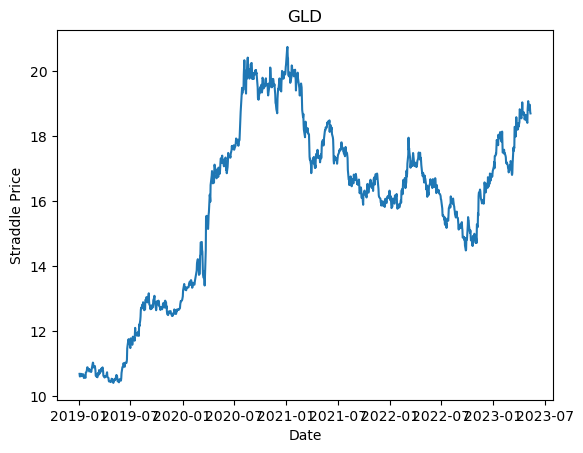

In [4]:
import yfinance as yf
from scipy.stats import norm
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt

# Define the tickers for the stock and the risk-free rate proxy
stock_ticker = "GLD"
rf_ticker = "^TNX"

# Set the start and end dates for the historical data
start_date = "2018-01-01"
end_date = date.today().strftime('%Y-%m-%d')

# Download historical prices for the stock and the risk-free rate
stock_prices = yf.download(stock_ticker, start=start_date, end=end_date)["Adj Close"]
rf_prices = yf.download(rf_ticker, start=start_date, end=end_date)["Adj Close"]

# Calculate the daily returns for the stock and the risk-free rate
stock_returns = stock_prices.pct_change()
rf_returns = rf_prices.pct_change()

# Define the Black-Scholes inputs
K = stock_prices.values  # strike price (at-the-money options)
r = rf_returns.mean() * 252  # annualized risk-free rate
t = 90 / 252  # time to maturity (in years)
sigma = stock_returns.rolling(window=252).std() * np.sqrt(252)  # annualized volatility

# Calculate the Black-Scholes call and put prices for each day
call_prices = pd.Series(index=stock_prices.index)
put_prices = pd.Series(index=stock_prices.index)

for i in range(len(stock_prices)):
    S = stock_prices.iloc[i]  # current stock price
    sigma_i = sigma.iloc[i]
    
    d1 = (np.log(S/K[i]) + (r + sigma_i**2/2) * t) / (sigma_i * np.sqrt(t))
    d2 = d1 - sigma_i * np.sqrt(t)
    call_price = S * norm.cdf(d1) - K[i] * np.exp(-r * t) * norm.cdf(d2)
    put_price = K[i] * np.exp(-r * t) * norm.cdf(-d2) - S * norm.cdf(-d1)
    
    call_prices.iloc[i] = call_price
    put_prices.iloc[i] = put_price

# Calculate the Black-Scholes straddle prices for each day
straddle_prices = call_prices + put_prices

# Create a DataFrame to store the stock prices and the theoretical straddle price
data = pd.concat([stock_prices, straddle_prices], axis=1)
data.columns = [stock_ticker, "Theoretical Straddle Price"]

# Plot the theoretical straddle price over time
fig, ax = plt.subplots()
ax.plot(data.index, data["Theoretical Straddle Price"])
ax.set_xlabel("Date")
ax.set_ylabel("Straddle Price")
ax.set_title(stock_ticker)
plt.show()
